In [12]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt

# Task 1: CAPM - Object-Oriented

Write a class called "CAPM". The members of the class are: alpha, beta, t-stat of alpha, t-stat of beta, adjusted R^2. The member function "fit_SML(.)" uses the GLS package of the statsmodels to fit the CAPM SML and to pin down alpha, beta, t-stat of alpha, t-stat of beta, adjusted R^2. Also, store the regression package's summary table as a private member of the CAPM class. Let member function "display_Regression_Table(.)" print out the regression summary table.

Test your class on an asset of your choice. How much of the asset's risk is diversifiable and how much is systematatic? Did the asset earn a significant alpha? How large has been the annualized Sharpe Ratio? Compare the average realized return with the SML-implied expected return.

In [34]:
class CAPM:
    
    def __init__(self):
        self.alpha = None
        self.beta = None
        self.t_stat_of_alpha = None
        self.t_stat_of_beta = None
        self.ajd_r_squared = None
        
    def fit_SML(self, excess_log_returns_A, excess_log_returns_M):
        res_fit = sm.GLS(endog=excess_log_returns_A, exog=sm.add_constant(excess_log_returns_M)).fit()        
        self._summary = res_fit.summary()
        alpha_A, beta_A = res_fit.params.values
        t_alpha_A, t_beta_A = res_fit.tvalues.values
        res_fit.rsquared_adj
        
    def display_Regression_Table(self):
        print(self._summary)
        

# ------------- Data Preparation ---------------

In [14]:
# Risk-free rate
# ---------------

r_f_ann = pd.read_csv("ps5_checker/riskfree.csv", index_col=0, squeeze=True)
r_f_ann.shape

(4279,)

In [15]:
r_f = r_f_ann / 252

In [16]:
# Asset returns
# -------------

r_A = pd.read_csv("ps5_checker/apple.csv", index_col=0, squeeze=True)
r_A.shape

(4279,)

In [17]:
# Are the shifts correct this way ?
def get_excess_log_returns(r_i, r_f):
    log_returns_i = np.log(r_i) - np.log(r_i.shift(1))

    excess_log_returns_i = log_returns_i.shift(-1) - r_f

    return excess_log_returns_i

In [18]:
excess_log_returns_A = get_excess_log_returns(r_A, r_f).dropna()

In [19]:
# Market returns
# --------------

r_M = pd.read_csv("ps5_checker/sp500.csv", index_col=0, squeeze=True)
r_M.shape

(4279,)

In [20]:
excess_log_returns_M = get_excess_log_returns(r_M, r_f).dropna()

# ----------- Fitting ------------ 

In [21]:
res_fit = sm.GLS(endog=excess_log_returns_A, exog=sm.add_constant(excess_log_returns_M)).fit()

In [22]:
alpha_A, beta_A = res_fit.params.values
res_fit.params

const    0.001109
0        1.052089
dtype: float64

In [23]:
t_alpha_A, t_beta_A = res_fit.tvalues.values
res_fit.tvalues

const     4.273225
0        49.606861
dtype: float64

In [24]:
res_fit.rsquared_adj

0.3651326723919738

Text(0, 0.5, '$E[r_A] - r_f$')

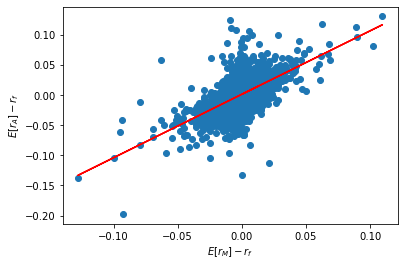

In [25]:
plt.scatter(excess_log_returns_M, excess_log_returns_A)
plt.plot(excess_log_returns_M, alpha_A + beta_A*excess_log_returns_M, color='red')
plt.xlabel(r'$E[r_M] - r_f$')
plt.ylabel(r'$E[r_A] - r_f$')

In [26]:
res_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.365
Model:                            GLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     2461.
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        10:26:51   Log-Likelihood:                 11367.
No. Observations:                4278   AIC:                        -2.273e+04
Df Residuals:                    4276   BIC:                        -2.272e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      4.273      0.000       0.001       0.002
0              1.0521      0.021     49.607      0.000       1.011       1.094
==============================================================================
Omnibus:                      742.583   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10477.356
Skew:                           0.390   Prob(JB):                         0.00
Kurtosis:                      10.627   Cond. No.                         81.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# -------- Fitting with CAPM -------------


In [35]:
capm = CAPM()

In [36]:
r_M = pd.read_csv("ps5_checker/sp500.csv", index_col=0, squeeze=True)
excess_log_returns_M = get_excess_log_returns(r_M, r_f).dropna()

In [80]:
r_A = pd.read_csv("ps5_checker/apple.csv", index_col=0, squeeze=True)
excess_log_returns_A = get_excess_log_returns(r_A, r_f).dropna()

In [38]:
capm.fit_SML(excess_log_returns_A, excess_log_returns_M)

In [39]:
capm.display_Regression_Table()

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            GLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     2461.
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        10:27:43   Log-Likelihood:                 11367.
No. Observations:                4278   AIC:                        -2.273e+04
Df Residuals:                    4276   BIC:                        -2.272e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      4.273      0.0

# ------------- Task 2: Risk Analysis -----------

In [40]:
total_risk = excess_log_returns_A.var() * 252
total_risk

0.11440698027961188

In [58]:
# Do we use the same beta here as calculated in the single index model?
sys_risk = excess_log_returns_M.var() * beta_A**2 * 252
print(excess_log_returns_M.var() * 252)
print(sys_risk)

0.03775501553419064
0.04179070873967355


In [59]:
asset_spec_risk = (total_risk - sys_risk)
asset_spec_risk

0.07261627153993833

In [62]:
print(asset_spec_risk/total_risk)
print(sys_risk/total_risk)

0.6347188900752679
0.36528110992473195


# --------- Task 3 -------------

In [81]:
avg_excess_return = excess_log_returns_A.mean() *252
avg_excess_return

0.34047340901221484

In [75]:
sml_expected_return = beta_A * excess_log_returns_M.mean() * 252
sml_expected_return

0.06091024659629336

In [48]:
# Mean excess return, so no **log** excess returns ?
sr_annualized = excess_log_returns_A.mean() / total_risk**0.5 * 252
sr_annualized

1.0066000271662157